In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
shootouts = pd.read_csv("../Datasets/archive/shootouts.csv")

In [25]:
shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [26]:
shootouts.describe()

,date,home_team,away_team,winner,first_shooter
count,637,637,637,637,223
unique,562,180,189,175,85
top,2016-06-03,South Africa,Egypt,South Korea,Colombia
freq,5,18,15,15,11


In [27]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           637 non-null    object
 1   home_team      637 non-null    object
 2   away_team      637 non-null    object
 3   winner         637 non-null    object
 4   first_shooter  223 non-null    object
dtypes: object(5)
memory usage: 25.0+ KB


In [28]:
shootouts.dropna(inplace=True)

In [29]:
shootouts.head()

,date,home_team,away_team,winner,first_shooter
26,1976-06-20,Czechoslovakia,Germany,Czechoslovakia,Czechoslovakia
36,1979-05-22,Argentina,Netherlands,Argentina,Argentina
41,1980-06-21,Italy,Czechoslovakia,Czechoslovakia,Italy
53,1982-07-08,Germany,France,Germany,France
71,1984-06-24,Denmark,Spain,Spain,Denmark


First Shooter vs. Non-First Shooter Wins

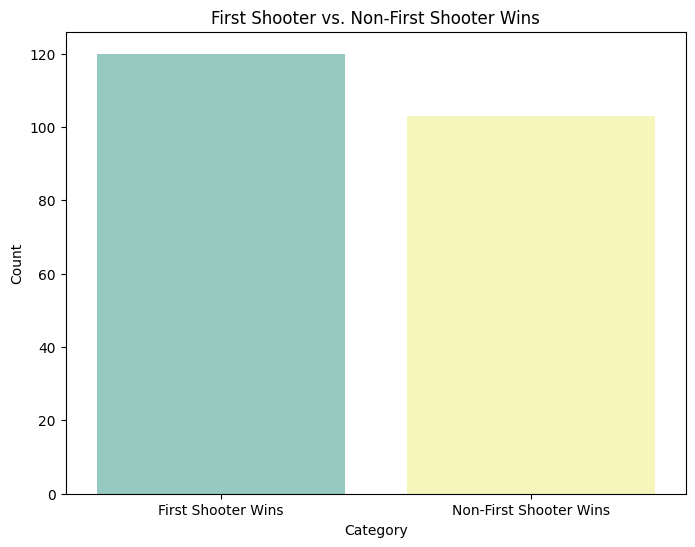

In [47]:
first_shooter_wins = (shootouts['first_shooter'] == shootouts['winner']).sum()
first_shooter_df = pd.DataFrame({
    'Category': ['First Shooter Wins', 'Non-First Shooter Wins'],
    'Count': [first_shooter_wins, len(shootouts) - first_shooter_wins]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=first_shooter_df, palette='Set3', hue='Category', legend=False)
plt.title('First Shooter vs. Non-First Shooter Wins')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Top 20 Country by Wins

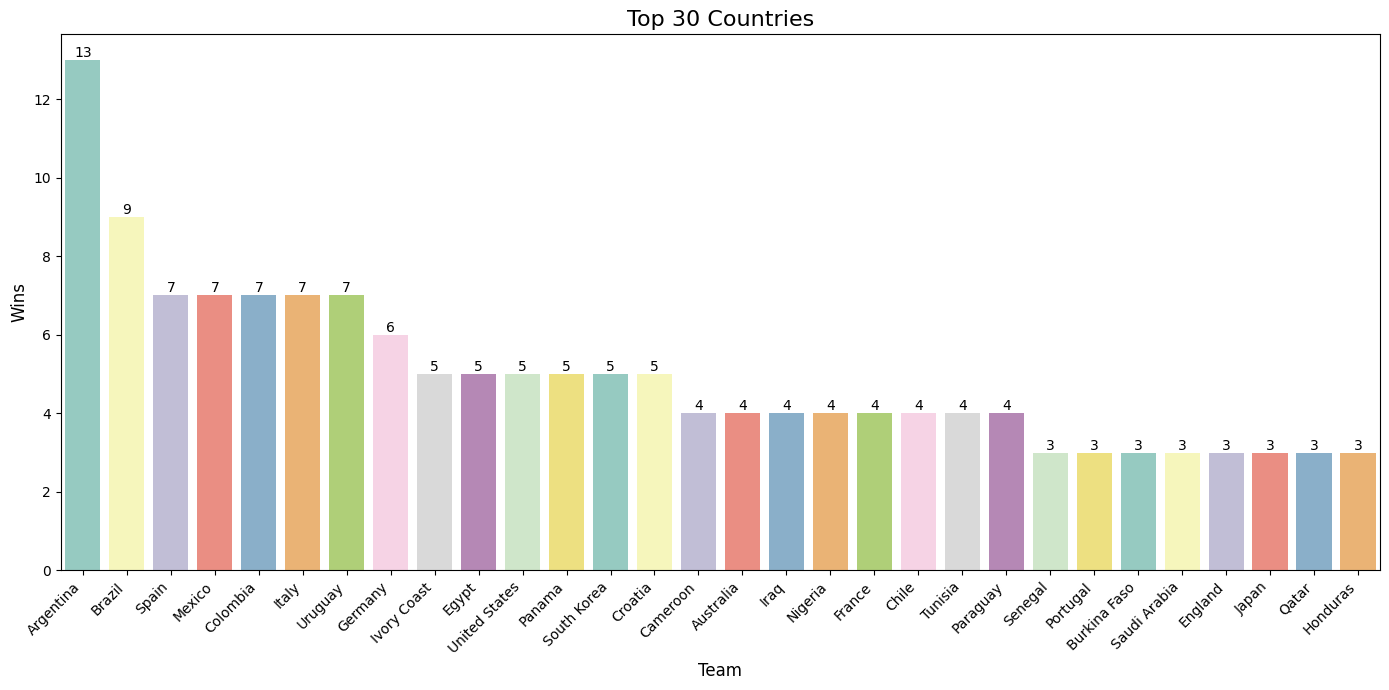

In [48]:
team_performance = shootouts['winner'].value_counts().head(30)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=team_performance.index, y=team_performance.values, palette='Set3', hue=team_performance.index, legend=False)
plt.title('Top 30 Countries', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Wins', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(team_performance.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

Home Team vs Away Team Wins

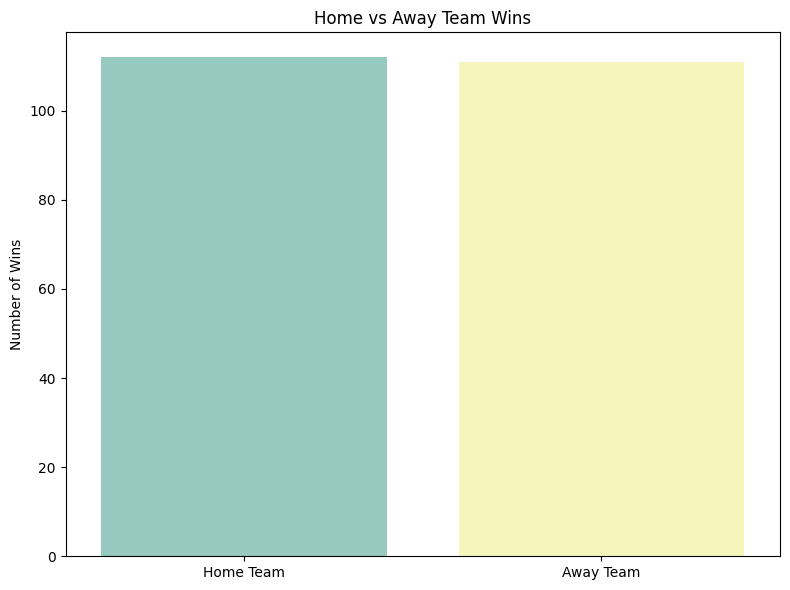

In [50]:
home_wins = (shootouts['winner'] == shootouts['home_team']).sum()
away_wins = (shootouts['winner'] == shootouts['away_team']).sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Home Team', 'Away Team'], y=[home_wins, away_wins], palette='Set3', hue=['Home Team', 'Away Team'], legend=False)
plt.title('Home vs Away Team Wins')
plt.ylabel('Number of Wins')
plt.tight_layout()
plt.show()

First Shooter: Home Team vs Away Team

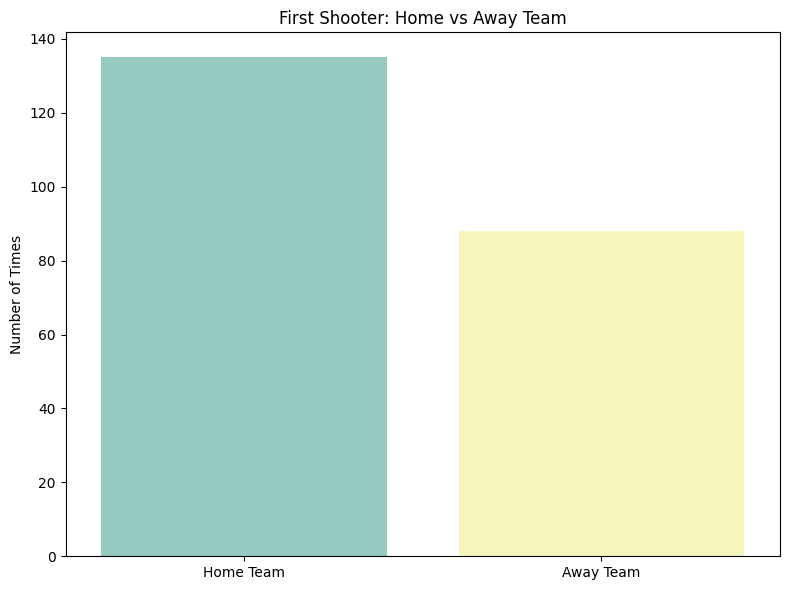

In [51]:
home_first_shooter = (shootouts['home_team'] == shootouts['first_shooter']).sum()
away_first_shooter = len(shootouts) - home_first_shooter

plt.figure(figsize=(8, 6))
sns.barplot(x=['Home Team', 'Away Team'], y=[home_first_shooter, away_first_shooter], palette='Set3', hue=['Home Team', 'Away Team'], legend=False)
plt.title('First Shooter: Home vs Away Team')
plt.ylabel('Number of Times')
plt.tight_layout()
plt.show()